# <center>Laboratorium 12<br>Metody Numeryczne</center>    


Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

In [2]:
import main
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.linalg import expm

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań różniczkowych
zwyczajnych. Będziemy rozpatrywać równania różniczkowe postaci
$$\dot{x}(t) = f(x(t), t)$$
gdzie:

$x(t) \in \mathbb{R}^n$,

$t \ge 0$ 


z warunkiem początkowym $x(0) = x0$

Jest to tak zwany problem początkowy (problem Cauchy’ego) dla równań różniczkowych zwyczajnych.

**Zadanie 1.**  
Zaimplementuj metodę *solve_euler* z main.py 


***Zadanie 2.*** 

Rozwiąż równanie 
$
\dot{x}(t)=\frac{x+t}{x-t}
$, 

$x(0)=1$ (równanie to posiada rozwiązanie dokładne: 
$x(t)=t+\sqrt{1+2t^2}$). 

Narysuj wykres podanego rozwiązania dokładnego oraz uzyskanych rozwiązań numerycznych.


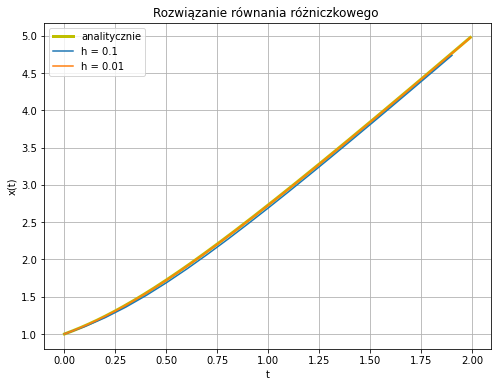

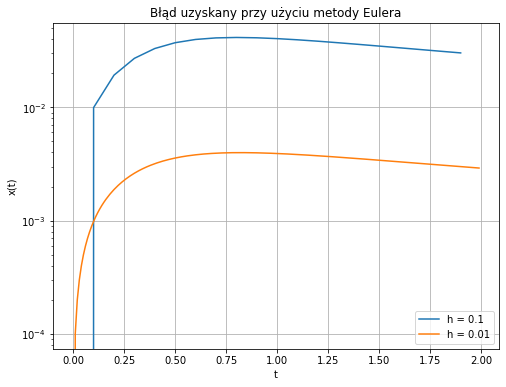

In [3]:
f = lambda t, x: (x + t) / (x - t)
solution_anal = lambda t: t + np.sqrt(1+2*t**2)

t_span_1 = np.arange(0, 2, 0.1)
t_span_2 = np.arange(0, 2, 0.01)

x0 = np.array([1])

num_ans_1 = main.solve_euler(f, t_span_1, x0)
num_ans_2 = main.solve_euler(f, t_span_2, x0)

plt.figure(figsize=(8, 6))
plt.plot(t_span_2, solution_anal(t_span_2), label="analitycznie", color='y', linewidth='3')
plt.plot(t_span_1, num_ans_1, label="h = 0.1")
plt.plot(t_span_2, num_ans_2, label="h = 0.01")
plt.title('Rozwiązanie równania różniczkowego ')
plt.legend()
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.show()


error1 = []
error2 = []

for index, value in enumerate(num_ans_1):
    error1.append(np.abs(value - solution_anal(t_span_1[index])))
    
for index, value in enumerate(num_ans_2):
    error2.append(np.abs(value - solution_anal(t_span_2[index])))
   
plt.figure(figsize=(8, 6))
plt.plot(t_span_1, error1, label="h = 0.1")
plt.plot(t_span_2, error2, label="h = 0.01")
plt.legend()
plt.grid()
plt.semilogy()
plt.title('Błąd uzyskany przy użyciu metody Eulera')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

***Zadanie 3.*** 

Rozwiąż układ równań różniczkowych: 
$$
\begin{array}{l}
\dot{x_1}(t)={x_3}(t)\\
\dot{x_2}(t)={x_4}(t)\\
\dot{x_3}(t)=-\frac{x_1(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}\\
\dot{x_4}(t)=-\frac{x_2(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}
\end{array}
$$
      
z warunkiem początkowym $x(0)=[1,0,0,1]^T$.
    
Dla takiego warunku początkowego układ ten ma rozwiązanie szczególne 
$$
x(t)=\left[\begin{matrix}
cos(t)\\
sin(t)\\
-sin(t)\\
cos(t)
\end{matrix}\right].
$$  

Narysuj wykres podanego rozwiązania szczegółowego oraz uzyskanych rozwiązań numerycznych.

Rozwiąnia metodą Eulera dla h = 0.001 i h = 0.01


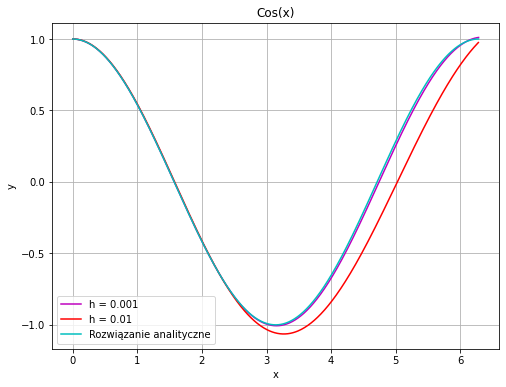

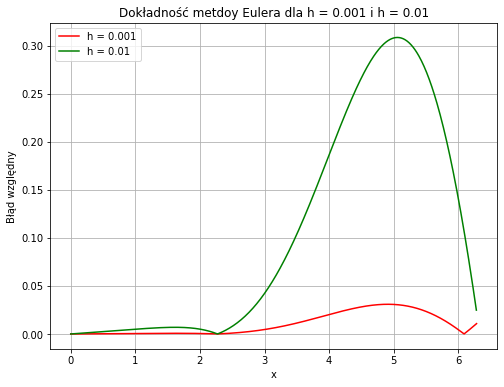

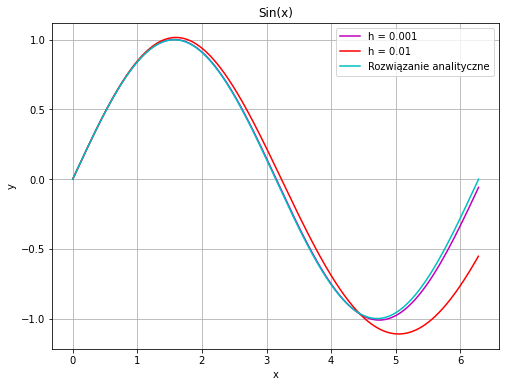

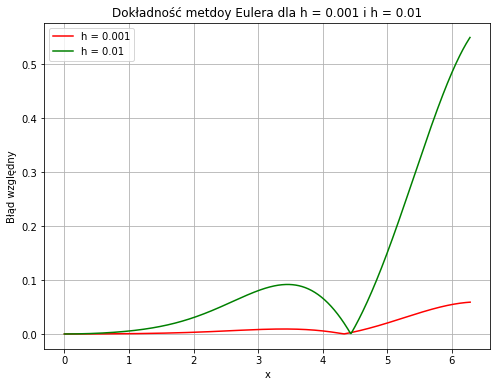

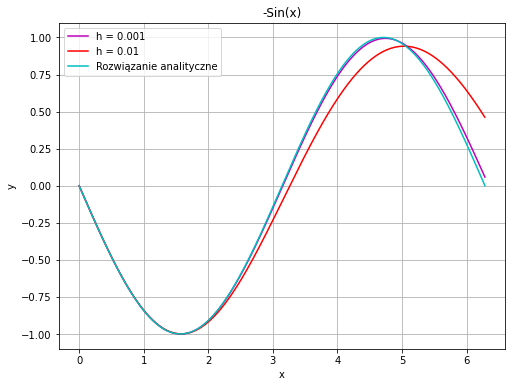

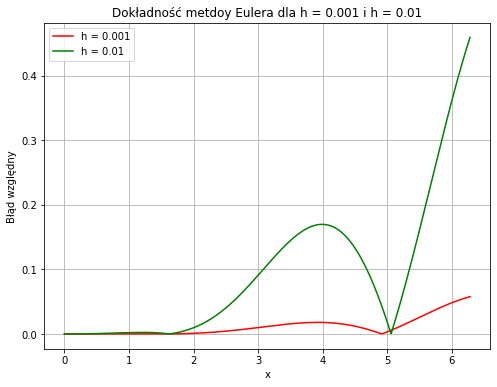

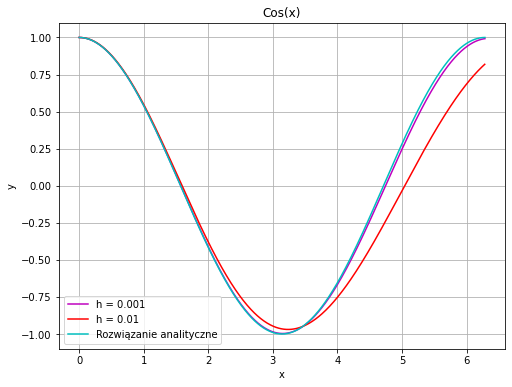

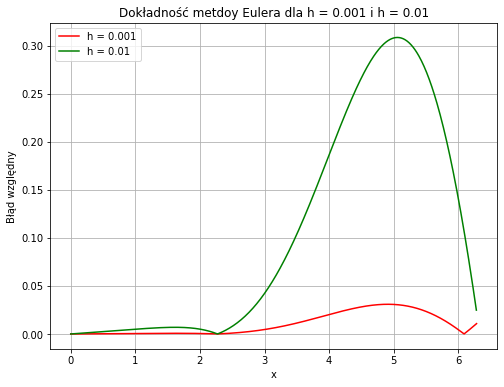

In [4]:
def fun_2(t,y):
    yr = np.ones((4,))
    yr[0] = y[2]
    yr[1] = y[3]
    yr[2] = -(y[0])/(y[0]**2 + y[1]**2)**1.5
    yr[3] = -(y[1])/(y[0]**2 + y[1]**2)**1.5
    return yr

print('Rozwiąnia metodą Eulera dla h = 0.001 i h = 0.01')
t_span = np.arange(0,2*np.pi,0.001)
t_span2 = np.arange(0,2*np.pi,0.01)
x0 = np.array([1, 0, 0, 1])
x = main.solve_euler(fun_2, t_span, x0)
x2 = main.solve_euler(fun_2, t_span2, x0)

err1 = []
err2 = []
err3 = []
err1_2 = []
err2_2 = []
err3_2 = []

for index,value in enumerate(x[:,0]):
    err1.append(np.abs(value - np.cos(t_span[index])))

for index,value in enumerate(x[:,1]):
    err2.append(np.abs(value - np.sin(t_span[index])))

for index,value in enumerate(x[:,2]):
    err3.append(np.abs(value + np.sin(t_span[index])))

for index,value in enumerate(x2[:,0]):
    err1_2.append(np.abs(value - np.cos(t_span2[index])))

for index,value in enumerate(x2[:,1]):
    err2_2.append(np.abs(value - np.sin(t_span2[index])))

for index,value in enumerate(x2[:,2]):
    err3_2.append(np.abs(value + np.sin(t_span2[index])))


    
       

plt.figure(figsize = (8,6))
plt.plot(t_span,x[:,0],'m',label = 'h = 0.001') 
plt.plot(t_span2,x2[:,0],'r',label = 'h = 0.01') 
plt.plot(t_span,np.cos(t_span),'c',label = 'Rozwiązanie analityczne')
plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cos(x)')

plt.figure(figsize = (8,6))
plt.plot(t_span,err1,'r',label = 'h = 0.001')
plt.plot(t_span2,err1_2,'g',label = 'h = 0.01')
plt.legend()
plt.title("Dokładność metdoy Eulera dla h = 0.001 i h = 0.01")
plt.xlabel('x')
plt.ylabel('Błąd względny')
plt.grid()
#plt.yscale('log')



plt.figure(figsize = (8,6))
plt.plot(t_span,x[:,1],'m',label = 'h = 0.001')
plt.plot(t_span2,x2[:,1],'r',label = 'h = 0.01') 
plt.plot(t_span,np.sin(t_span),'c',label = 'Rozwiązanie analityczne')
plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sin(x)')

plt.figure(figsize = (8,6))
plt.plot(t_span,err2,'r',label = 'h = 0.001')
plt.plot(t_span2,err2_2,'g',label = 'h = 0.01')
plt.legend()
plt.title("Dokładność metdoy Eulera dla h = 0.001 i h = 0.01")
plt.xlabel('x')
plt.ylabel('Błąd względny')
plt.grid()
#plt.yscale('log')



plt.figure(figsize = (8,6))
plt.plot(t_span,x[:,2],'m',label = 'h = 0.001')
plt.plot(t_span2,x2[:,2],'r',label = 'h = 0.01') 
plt.plot(t_span,-np.sin(t_span),'c',label = 'Rozwiązanie analityczne')
plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('-Sin(x)')

plt.figure(figsize = (8,6))

plt.plot(t_span,err3,'r',label = 'h = 0.001')
plt.plot(t_span2,err3_2,'g',label = 'h = 0.01')
plt.legend()
plt.title("Dokładność metdoy Eulera dla h = 0.001 i h = 0.01")
plt.xlabel('x')
plt.ylabel('Błąd względny')
plt.grid()
#plt.yscale('log')



plt.figure(figsize = (8,6))
plt.plot(t_span,x[:,3],'m',label = 'h = 0.001')
plt.plot(t_span2,x2[:,3],'r',label = 'h = 0.01') 
plt.plot(t_span,np.cos(t_span),'c',label = 'Rozwiązanie analityczne')
plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cos(x)')

plt.figure(figsize = (8,6))

plt.plot(t_span,err1,'r',label = 'h = 0.001')
plt.plot(t_span2,err1_2,'g',label = 'h = 0.01')
plt.legend()
plt.title("Dokładność metdoy Eulera dla h = 0.001 i h = 0.01")
plt.xlabel('x')
plt.ylabel('Błąd względny')
plt.grid()
#plt.yscale('log')

***Zadanie 4.*** 

Rozwiąż układ równań $\dot{x}(t)=\mathbf{A}x(t)$, gdzie macierz 
$
\mathbf{A}$ dana jest wzorem:  
$$
\mathbf{A}=\left[\begin{matrix}
-667 & 333 \\
 666 & -334
\end{matrix}\right]
$$

z warynkiem początkowym $x(0)=[0, 3]^T$

Narysuj wykres uzyskanych rozwiązań numerycznych. Jakie jest rozwiązanie dokładne tego równania?

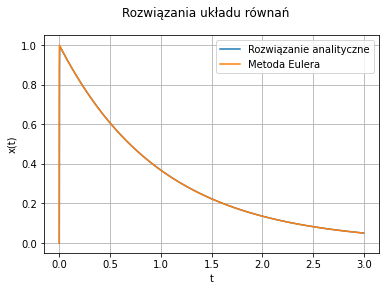

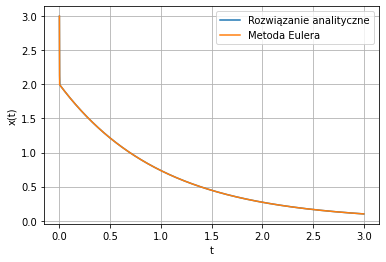

In [5]:
A = np.array([[-667, 333], [666, -334]])
f = lambda t, x: A @ x

t_span = np.arange(0, 3, 0.001) # Taki duży krok bo przy mniejszym było bardzo niedokładnie

x0 = np.array([0, 3])
x = main.solve_euler(f, t_span, x0)

x_an = []
for t in t_span:
    x_an.append(expm(A * t) @ x0)
x_an = np.array(x_an)

plt.suptitle('Rozwiązania układu równań')

plt.plot(t_span, x_an[:,0], t_span, x[:,0])
plt.legend(['Rozwiązanie analityczne', 'Metoda Eulera'])
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.show()

plt.plot(t_span, x_an[:,1], t_span, x[:,1])
plt.legend(['Rozwiązanie analityczne', 'Metoda Eulera'])
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.show()

***Zadanie 5.*** 

Orbita Arenstorfa. Jest to przykład z astronomii opisujący zredukowany problem trzech ciał. Rozważa się dwa ciała o masach $\mu$ i $\mu'=1-\mu$, poruszające się w ruchu kołowym na jednej płaszczyźnie oraz ciało o pomijalnej masie poruszające się między nimi w tej samej płaszczyźnie. Dany jest układ równań różniczkowych:
$$
\begin{array}{l}
\dot{x_1}(t)={x_2}(t)\\
\dot{x_2}(t)={x_1}(t)+2x_4(t)-\mu'\frac{x_1+\mu}{D_1}-\mu\frac{x_1-\mu'}{D_2}\\
\dot{x_3}(t)=x_4(t)\\
\dot{x_4}(t)=x_3(t)-2x_2(t)-\mu'\frac{x_3(t)}{D_1}
-\mu\frac{x_3(t)}{D_2}\end{array}.
$$

gdzie
$$
\begin{array}{l}
D_1=((x_1(t)+\mu)^2+{x_3}^2(t))^\frac{3}{2}\\
D_2=((x_1(t)-\mu')^2+{x_3}^2(t))^\frac{3}{2}\\
\mu=0.012277471\end{array}.
$$

Zmienne $x_1$ i $x_3$ odpowiadają za współrzędne na płaszczyźnie trzeciego ciała zaś $x_2$ i $x_4$
są odpowiednio prędkościami. Warto zwrócić uwagę, że zarówno czas jak i masa zostały
w równaniach przeskalowane, i nie mają bezpośredniej interpretacji fizycznej, należy je
traktować jako zmienne bezwymiarowe. Dla pewnych warunków początkowych i czasu
symulacji
$$
\begin{array}{l}
x_1(0) = 0.994\\
x_2(0) = 0\\
x_3(0) = 0\\
x_4(0) = − 2.00158510637908252240537862224\\
T = 17.0652165601579625588917206249.\end{array}
$$
dokładne rozwiązanie tych równań jest okresowe ($x(0)=x(T)$).

Narysuj wykres uzyskanych rozwiązań numerycznych.

Rozwiązanie numeryczne orbity Arenstorfa dla h = 0.1


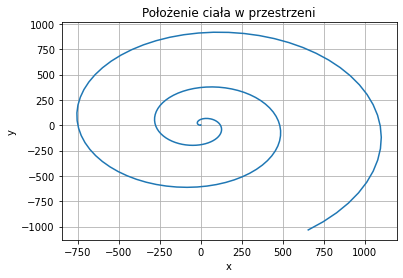

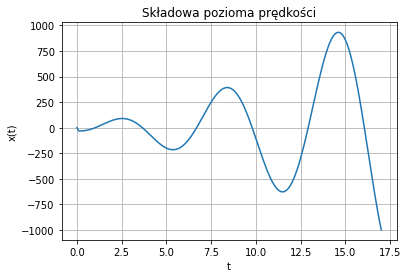

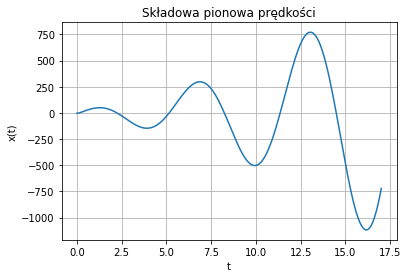

In [6]:
def fun(t, x):
    h = 0.012277471
    h_ = 1 - h
    D_1 = ((x[0] + h) ** 2 + x[2] ** 2) ** (3/2)
    D_2 = ((x[0] - h_) ** 2 + x[2] ** 2) ** (3/2)
    dx1 = x[1]
    dx2 = x[0] + 2 * x[3] - h_ * ((x[0] + h)/D_1) - h * ((x[0] - h_)/D_2)
    dx3 = x[3]
    dx4 = x[2] - 2 * x[1] - h_ * (x[2]/D_1) - h * (x[2]/D_2)
    
    return np.array([dx1, dx2, dx3, dx4])

T = 17.0652165601579625588917206249
t_span = np.arange(0, T, 0.1)
x0 = np.array([0.994, 0, 0, -2.00158510637908252240537862224])
x = main.solve_euler(fun,t_span,x0)


print('Rozwiązanie numeryczne orbity Arenstorfa dla h = 0.1')

plt.plot(x[:, 0], x[:, 2])
plt.title('Położenie ciała w przestrzeni')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

plt.plot(t_span, x[:,1])
plt.title('Składowa pozioma prędkości')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.show()

plt.plot(t_span, x[:,3])
plt.title('Składowa pionowa prędkości')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.show()

Rozwiązanie numeryczne orbity Arenstorfa dla h = 0.001 oraz h = 0.00001


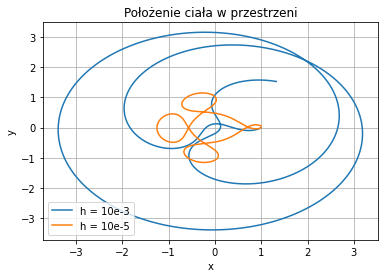

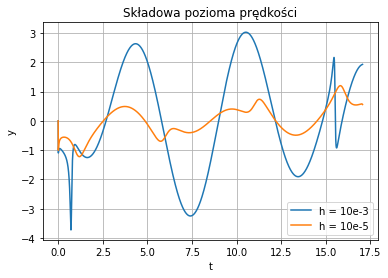

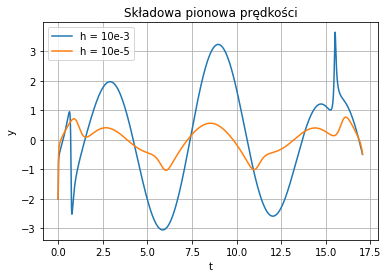

In [7]:
print('Rozwiązanie numeryczne orbity Arenstorfa dla h = 0.001 oraz h = 0.00001')

t_span_1 = np.arange(0, T, 0.001)
x1 = main.solve_euler(fun, t_span_1, x0)

t_span_2 = np.arange(0, T, 0.00001)
x2 = main.solve_euler(fun ,t_span_2, x0)

plt.plot(x1[:, 0], x1[:, 2], label='h = 10e-3')
plt.plot(x2[:, 0], x2[:, 2], label='h = 10e-5')
plt.title('Położenie ciała w przestrzeni')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


plt.plot(t_span_1, x1[:,1], label='h = 10e-3')
plt.plot(t_span_2, x2[:,1], label='h = 10e-5')
plt.title('Składowa pozioma prędkości')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


plt.plot(t_span_1, x1[:,3], label='h = 10e-3')
plt.plot(t_span_2, x2[:,3], label='h = 10e-5')
plt.title('Składowa pionowa prędkości')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

### Wnioski:

Na tym laboratorium zapoznaliśmy sie z numeryczną metodą Eulera rozwiązywania równań i układów równań róźniczkowych. Na podstawie powyższych zadań można stwierdzić, że wyniki są bardzo dobrym przybliżeniem rozwiązań analitycznych pod warunkiem odpowiednio dobranego kroku h. Przy dobraniu zbyt dużego kroku (małej ilości punktów, w których obliczamy pochodną) rozwiązanie potrafi generować duże błędy (jak w zadaniu 2. czy 3) nawet całkiem nie przypominając prawdziwego rozwiązania (jak w przypadku orbity Arenstorfa, gdzie przy h = 0.01 wychodzi spirala, a przy h = 0.001 orbita przypomina już tę zamierzoną, aczkolwiek nie domyka się). Niestety wraz ze zwiększaniem dokładności rozwiązań rośnie również złożoność obliczeniowa, co czasem może stanowić utrudnienie dla sprzętu, którym dysponujemy.

**Bibliografia**

1. J. C. Butcher. Numerical Methods for Ordinary Differential Equations. John Wiley and Sons, Ltd., 2003.
2. Z. Fortuna, B. Macukow, and J. Wąsowski. Metody numeryczne. WNT Warszawa, 1982.
3. E. Hairer, S.P. Nørsett, and G. Wanner. Solving Ordinary Differential Equations: I Nonstiff problems. Springer, 2 edition, 2000.
4. W. Mitkowski. Równania macierzowe i ich zastosowania. Wydawnictwa AGH, Kraków,2 edition, 2007.
5. A. Ralston. Wstęp do analizy numerycznej. PWN, Warszawa, 1965.
6. L. F. Shampine, I. Gladwell, and S. Thompson. Solving ODEs with MATLAB. Cambridge University Press, 2003.
7. Stoer, J., Burlirsch, R., 1980: Wstêp do metod numerycznych, tom 2. PWN Warszawa.
